In [1]:
class Point(object):

    def __init__(self,x,y):
        self.x = x
        self.y = y

class QuadBox(object):

    def __init__(self,x,y,w,h):
        self.x = x
        self.y = y
        self.w = w
        self.h = h

    def contains(self, point):
        point_contained = ( point.x >= self.x - self.w/2. and \
                            point.x <= self.x + self.w/2. and \
                            point.y >= self.y - self.h/2. and \
                            point.y <= self.y + self.h/2.)
        return point_contained

class QuadTree(object):
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.patches import Rectangle

    def __init__(self, boundary, capacity):
        self.boundary = boundary
        self.capacity = capacity
        self.points = []
        self.divide = False

    def subdivide(self):
        x = self.boundary.x
        y = self.boundary.y
        w = self.boundary.w
        h = self.boundary.h

        # | ------- | ------- |
        # | nw      | ne      |
        # |         |         |
        # | ------- | ------- |
        # | sw      | se      |
        # |         |         |
        # | ------- | ------- |

        nw = QuadBox( x - w/4., y + h/4., w/2., h/2.)
        ne = QuadBox( x + w/4., y + h/4., w/2., h/2.)
        sw = QuadBox( x - w/4., y - h/4., w/2., h/2.)
        se = QuadBox( x + w/4., y - h/4., w/2., h/2.)

        # print(f'capacity={self.capacity}')
        self.ne = QuadTree(ne, self.capacity)
        self.nw = QuadTree(nw, self.capacity)
        self.se = QuadTree(se, self.capacity)
        self.sw = QuadTree(sw, self.capacity)
        # print('subdivided')
        self.divide = True
        for pt in self.points:
            self.ne.insertpoint(pt)
            self.nw.insertpoint(pt)
            self.se.insertpoint(pt)
            self.sw.insertpoint(pt)

    def insertpoint(self,point):
        if (not self.boundary.contains(point)):
            # print('not my problem')
            return False
        size = np.size(self.points)
        if (size < self.capacity):
            # print(f'{size} vs {self.capacity}... I can take more...')
            self.points.append(point)
            return True
        else:
            if ( not self.divide ):
                # print(f'{size} vs {self.capacity}...I want to divide')
                self.subdivide()
        if ( self.ne.insertpoint(point)):
            return True
        elif( self.nw.insertpoint(point)):
            return True
        elif( self.se.insertpoint(point)):
            return True
        elif( self.sw.insertpoint(point)):
            return True
    
    def show(self,ax):
        # print('plotting...')
        # print(self.divide)
        if (self.divide):
            # print('going to show dub-domain')
            self.ne.show(ax)
            self.nw.show(ax)
            self.se.show(ax)
            self.sw.show(ax)
        x = self.boundary.x
        y = self.boundary.y
        w = self.boundary.w
        h = self.boundary.h
        ax.add_patch(Rectangle((x-w/2, y-w/2), w, h,
                    edgecolor = 'k',
                    fill=False,
                    lw=1))

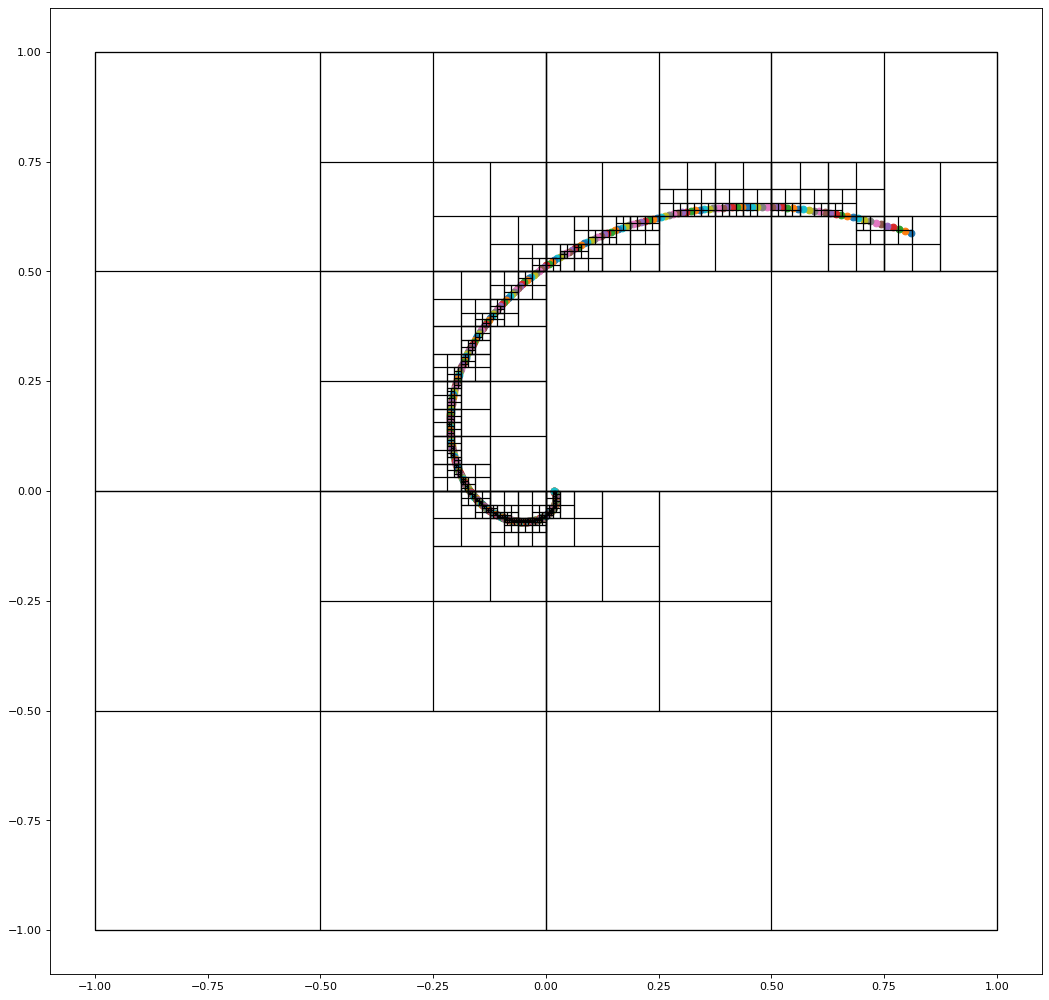

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

qt = QuadTree(boundary=QuadBox(0.0,0.0,2,2), capacity=2)

#define Matplotlib figure and axis
fig, ax = plt.subplots(dpi=80,figsize=(16,16))
npts = 500
# xpts = np.random.rand(npts)
xpts = np.cos(np.pi*2*np.linspace(0.1,1,npts))
# ypts = np.random.rand(npts)
ypts = np.sin(np.pi*2*np.linspace(0.1,1,npts))
#create simple line plot
# ax.scatter(xpts,ypts)

for i in range(npts):
    x = xpts[i]*0.992**i
    y = ypts[i]*0.992**i
    ax.scatter(x,y)
    pnt = Point(x,y)
    qt.insertpoint(pnt)
#add rectangle to plot
qt.show(ax)
# x = qt.boundary.x
# y = qt.boundary.y
# w = qt.boundary.w
# h = qt.boundary.h
# ax.add_patch(Rectangle((x, y), w, h,
#              edgecolor = 'k',
#              facecolor = 'blue',
#              fill=False,
#              lw=1))

#display plot
plt.show()

In [15]:
.99**40

0.6689717585696803